<a href="https://colab.research.google.com/github/51stDimension/AIML/blob/main/Experiments/LinearSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd
data_set= pd.read_csv('https://raw.githubusercontent.com/51stDimension/AIML/main/Data/LinearSVM.csv')
data_set = data_set.head(30)
#Extracting Independent and dependent Variable
x= data_set.iloc[:, [2,3]].values
y= data_set.iloc[:, 4].values
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size= 0.01,random_state=0)
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)
from sklearn.svm import SVC # "Support vector classifier"
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

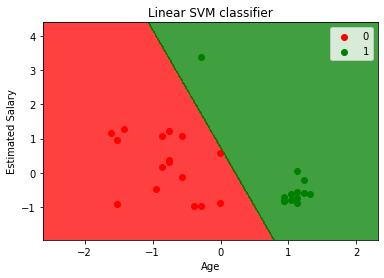

In [6]:
%%capture --no-display
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1,x2=nm.meshgrid(nm.arange(start=x_set[:,0].min()- 1,stop=x_set[:,0].max()+1,step=0.01),
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
mtp.contourf(x1,x2,
classifier.predict(nm.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape), alpha =
0.75, cmap = ListedColormap(('red', 'green'))) 
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)):
  mtp.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
mtp.title('Linear SVM classifier')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()